In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from network import Network, TargetNetwork
from layer import LowPassFilter

## 教師信号が無い場合

In [3]:
np.random.seed(seed=0)
network = Network(force_self_prediction=True)
target_network = TargetNetwork()
    
network.load("saved")
target_network.load("saved")

dt = 0.1
lp_filter = LowPassFilter(dt, 3)

inputs = []
targets = []
outputs = []

for i in range(30):
    input_values, target_values = target_network.get_training_pair()
    for j in range(1000):
        filtered_input_values = lp_filter.process(input_values)
        inputs.append(filtered_input_values)
        network.set_input_firing_rate(filtered_input_values)
        network.update(dt)
        
        targets.append(target_values)
        outputs.append(network.layers[2].get_p_activation())
        
inputs = np.array(inputs)
targets = np.array(targets)
outputs = np.array(outputs)

weight loaded: saved/layer0.npz
weight loaded: saved/layer1.npz
loaded: saved
target loaded: saved


In [4]:
inputs.shape

(30000, 30)

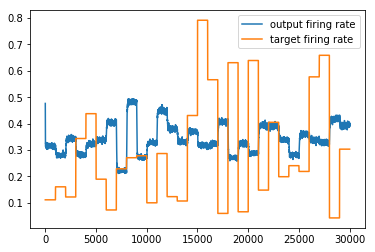

In [5]:
check_index = 1
plt.plot(outputs[:,check_index], label="output firing rate")
plt.plot(targets[:,check_index], label="target firing rate")
plt.legend()
plt.show()

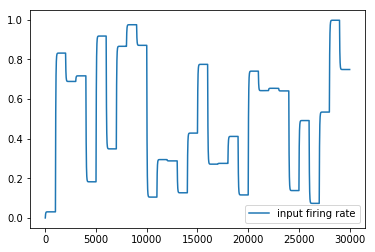

In [6]:
plt.plot(inputs[:,2], label="input firing rate")
plt.legend()
plt.show()

In [7]:
data_file_path = "saved/layer1.npz"
data = np.load(data_file_path)

w_pp_bu_1 = data["w_pp_bu"]
w_pp_td_1 = data["w_pp_td"]
w_ip_1    = data["w_ip"] # (10,20)
w_pi_1    = data["w_pi"] # (20,10)

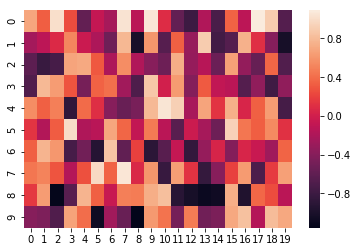

In [8]:
sns.heatmap(w_pp_bu_1) # 学習対象
plt.show()

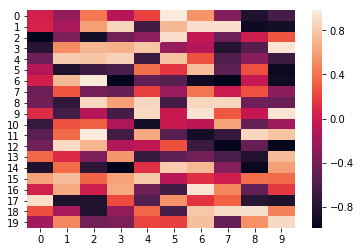

In [9]:
sns.heatmap(w_pp_td_1) # 固定
plt.show()

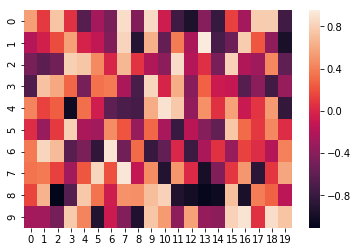

In [10]:
sns.heatmap(w_ip_1) # 学習対象
plt.show()

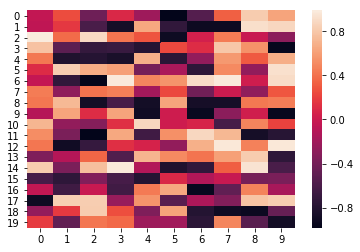

In [11]:
sns.heatmap(w_pi_1) # 固定?
plt.show()

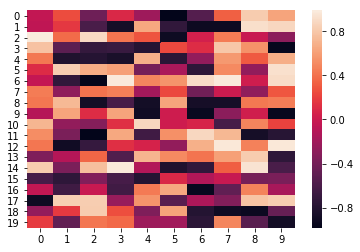

In [12]:
sns.heatmap(-w_pp_td_1) # 固定, w_ipとマイナスの関係になっているのを確認
plt.show()

In [13]:
data_file_path = "saved/layer0.npz"
data = np.load(data_file_path)
w_pp_bu_0 = data["w_pp_bu"]
w_pp_td_0 = data["w_pp_td"]

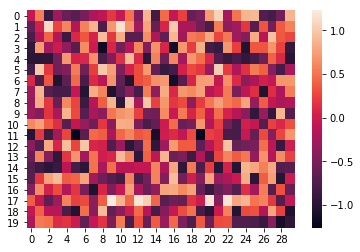

In [14]:
sns.heatmap(w_pp_bu_0) # 学習対象
plt.show()

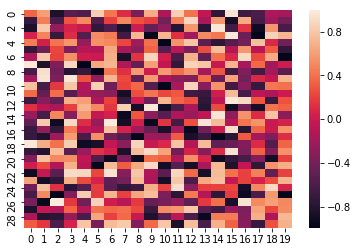

In [15]:
sns.heatmap(w_pp_td_0) # 固定
plt.show()

## 教師信号を入れた場合の確認

In [16]:
np.random.seed(seed=0)
network = Network(force_self_prediction=True)
target_network = TargetNetwork()
    
network.load("saved")
target_network.load("saved")
    
dt = 0.1
lp_filter = LowPassFilter(dt, 3)

train_inputs = []
train_targets = []
train_outputs = []

for i in range(30):
    input_values, target_values = target_network.get_training_pair()
    for j in range(1000):
        filtered_input_values = lp_filter.process(input_values)
        train_inputs.append(filtered_input_values)
        network.set_target_firing_rate(target_values)
        network.set_input_firing_rate(filtered_input_values)
        network.update(dt)
        
        train_targets.append(target_values)
        train_outputs.append(network.layers[2].get_p_activation())
        
train_inputs = np.array(train_inputs)
train_targets = np.array(train_targets)
train_outputs = np.array(train_outputs)

weight loaded: saved/layer0.npz
weight loaded: saved/layer1.npz
loaded: saved
target loaded: saved


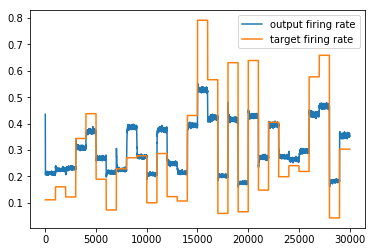

In [17]:
check_index = 1
plt.plot(train_outputs[:,check_index], label="output firing rate")
plt.plot(train_targets[:,check_index], label="target firing rate")
plt.legend()
plt.show()